In [9]:
import os

import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
from utils import *

import tensorflow as tf

In [10]:
def stack_frames(to_be_stacked, compass):
    
    stacked_frames = deque([np.zeros((64,64), dtype=np.uint) for i in range(stack_size)], maxlen=4)
    compass_channel = np.ones(shape=list(to_be_stacked[0].shape[:-1]) + [1], dtype=to_be_stacked.dtype) * compass

    if len(to_be_stacked) != 4:
        for x in range(4-len(to_be_stacked)):
            stacked_frames.append(np.array(Image.fromarray(to_be_stacked[0].reshape(64,64,3), "RGB").convert("L")))
        for x in range(len(to_be_stacked)):
            stacked_frames.append(np.array(Image.fromarray(to_be_stacked[x].reshape(64,64,3), "RGB").convert("L")))
        
        stacked_frames = np.stack(stacked_frames, axis=2)
        stacked_frames = np.concatenate([stacked_frames, compass_channel], axis=-1)
    else:
        for x in range(len(to_be_stacked)):
            stacked_frames.append(np.array(Image.fromarray(to_be_stacked[x].reshape(64,64,3), "RGB").convert("L")))
        
        stacked_frames = np.stack(stacked_frames, axis=2)
        stacked_frames = np.concatenate([stacked_frames, compass_channel], axis=-1)
    
    return stacked_frames

(array([[[[ 5.,  4.,  9.],
          [ 5.,  4.,  9.],
          [ 4.,  3.,  8.],
          ...,
          [ 4.,  3.,  8.],
          [ 4.,  3.,  8.],
          [ 4.,  3.,  8.]],
 
         [[ 5.,  4.,  9.],
          [ 5.,  4.,  9.],
          [ 5.,  4.,  9.],
          ...,
          [ 4.,  3.,  8.],
          [ 4.,  3.,  8.],
          [ 4.,  3.,  8.]],
 
         [[ 5.,  4.,  9.],
          [ 5.,  4.,  9.],
          [ 5.,  4.,  9.],
          ...,
          [ 2.,  3.,  6.],
          [ 2.,  3.,  8.],
          [ 2.,  3.,  8.]],
 
         ...,
 
         [[23., 35., 17.],
          [30., 42., 24.],
          [ 0.,  8.,  0.],
          ...,
          [42., 58., 37.],
          [34., 50., 31.],
          [ 0.,  6.,  0.]],
 
         [[33., 39., 30.],
          [ 0.,  2.,  0.],
          [ 1.,  0.,  2.],
          ...,
          [39., 59., 34.],
          [34., 45., 32.],
          [ 0.,  4.,  0.]],
 
         [[ 0.,  2.,  0.],
          [ 0.,  2.,  0.],
          [ 1.,  0.,  2.],
   

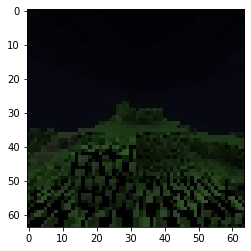

In [11]:
path = "C:\\Users\\Robin\\Desktop\\deep_learning\\MineRLNavigateDense-v0\\"

def generate_random_video(path, batch_size=1):
    frame_shape = 64*64*3
    
    videos = list(os.listdir(path))
    
    random_video_num = np.random.randint(len(videos))
    rand_vid = os.path.join(path+videos[random_video_num])
    
    vid_labels = np.load(rand_vid+"\\rendered.npz", allow_pickle=True)
    vid_labels = [vid_labels[x] for x in vid_labels.keys()]
    
    rewards = np.array(vid_labels[0])
    compass_angle = np.array(vid_labels[1])/180.
    
    camera_x = np.array([x[0] for x in vid_labels[11]])/180.
    camera_y = np.array([x[1] for x in vid_labels[11]])/180.
    place = vid_labels[-1]
    vid_labels = vid_labels[:11]
    vid_labels.append(camera_x)
    vid_labels.append(camera_y)
    vid_labels.append(place)
    vid_labels = vid_labels[3:]
    
    for i in range(len(vid_labels[-1])):
        if vid_labels[-1][i] == "none":
            vid_labels[-1][i] = 0
        else:
            vid_labels[-1][i] = 1
    
    actions = []
    
    for i in range(len(vid_labels[0])):
        action_cluster = []
        for x in range(11):
            action_cluster.append(vid_labels[x][i])
        actions.append(action_cluster)
    
    load_vid = np.load(rand_vid+"\\NDTRAIN.npy", allow_pickle=True)[0]
    
    frames = int(load_vid.shape[0]/frame_shape)
    
    reshaped_vid = load_vid.reshape(frames, 64, 64, 3)[-len(vid_labels[0]):]
    plt.imshow(reshaped_vid[0].astype(np.uint8))
    
    return reshaped_vid, actions, compass_angle, rewards

generate_random_video(path)

In [42]:
def build_model():
    dqn = keras.models.Sequential([
        keras.layers.Conv2D(64, kernel_size=5, strides=2, input_shape=[64, 64, 5]),
        keras.layers.Conv2D(32, kernel_size=3, strides=1),
        keras.layers.Flatten(),
        keras.layers.Dense(50),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(11)
        
    ])

    return dqn

In [43]:
target_model = build_model()
loss_fn = keras.losses.mean_squared_error
optimizer = keras.optimizers.Adam(lr=1e-3)

0
(1, 64, 64, 5)
tf.Tensor(355.40234, shape=(), dtype=float32)
1
(1, 64, 64, 5)
tf.Tensor(22178.088, shape=(), dtype=float32)
2
(1, 64, 64, 5)
tf.Tensor(9480752.0, shape=(), dtype=float32)
3
(1, 64, 64, 5)
tf.Tensor(175013.94, shape=(), dtype=float32)
4
(1, 64, 64, 5)
tf.Tensor(77246.266, shape=(), dtype=float32)
5
(1, 64, 64, 5)
tf.Tensor(345.0016, shape=(), dtype=float32)
6
(1, 64, 64, 5)
tf.Tensor(885787.06, shape=(), dtype=float32)
7
(1, 64, 64, 5)
tf.Tensor(623041.56, shape=(), dtype=float32)
8
(1, 64, 64, 5)
tf.Tensor(1737805.1, shape=(), dtype=float32)
9
(1, 64, 64, 5)
tf.Tensor(325364.25, shape=(), dtype=float32)
10
(1, 64, 64, 5)
tf.Tensor(277536.03, shape=(), dtype=float32)
11
(1, 64, 64, 5)
tf.Tensor(3964.049, shape=(), dtype=float32)
12
(1, 64, 64, 5)
tf.Tensor(72061.31, shape=(), dtype=float32)
13
(1, 64, 64, 5)
tf.Tensor(25504.736, shape=(), dtype=float32)
14
(1, 64, 64, 5)
tf.Tensor(218921.19, shape=(), dtype=float32)
15
(1, 64, 64, 5)
tf.Tensor(49166.89, shape=(), dtype

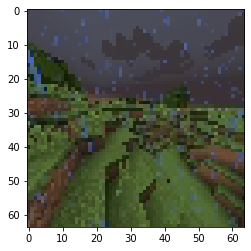

In [44]:
q_model = keras.models.clone_model(target_model)
q_model.set_weights(target_model.get_weights())

def train_model(target_model, q_model, n_epochs=100):
    tau = 10
    discount_factor = 0.95
    
    for epoch in range(n_epochs):
        video, actions, compass_angle, rewards = generate_random_video(path)

        print(epoch)
        batch = np.random.randint(video.shape[0])
        
        state = np.array(video[batch-4:batch])
        n_state = np.array(video[batch-3:batch+1])
        actions = np.array(actions[batch])
        rewards = np.array(rewards[batch])
        
        frames = stack_frames(state, compass_angle[batch]).reshape(1, 64, 64, 5)
        n_frames = stack_frames(n_state, compass_angle[batch+1]).reshape(1, 64, 64, 5)
        print(frames.shape)
        
        for a in range(len(actions)):
            if actions[a] != 0:
                if actions[a] != 1:
                    actions[a] = 1
        
        target_values = target_model.predict(n_frames)
        max_target_values = np.max(target_values, axis=1)
        target_Q_values = (rewards +
                          discount_factor * max_target_values)
        mask = tf.one_hot(actions, 11)
        with tf.GradientTape() as tape:
            all_Q_values = q_model(frames)
            Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
            loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))
        
        print(loss)
        
        grads = tape.gradient(loss, q_model.trainable_variables)
        optimizer.apply_gradients(zip(grads, q_model.trainable_variables))
        
        if epoch % tau == 0:
            target_model.set_weights(q_model.get_weights())

train_model(target_model, q_model)

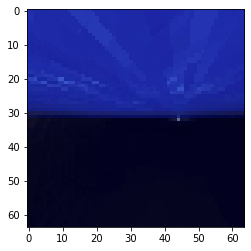

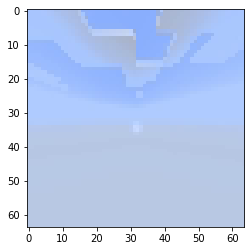

Guessed actions:  [[  41.  691.  140. -273.   -7.  -77. -115.  -17.   59.  -35.   11.]]
Actual actions:  [[  28.  609.  182. -265.   67.  -32.  -68.  -24.   24.   12.  -19.]]


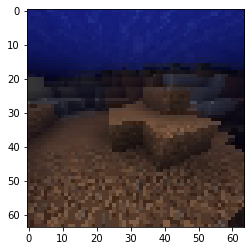

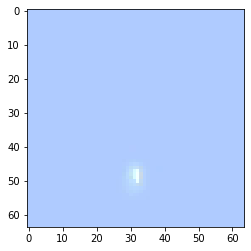

Guessed actions:  [[  41.  723.  192. -284.   64.  -36. -115.  -32.   22.  -26.   -8.]]
Actual actions:  [[  49.  382.  132. -178.   67.   21.  -68.  -47.    8.    6.   20.]]


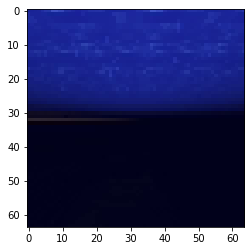

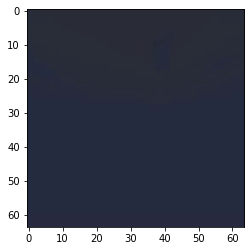

Guessed actions:  [[  30.  658.  178. -267.   64.  -42.  -94.  -33.   33.   -6.  -18.]]
Actual actions:  [[  20.  997.  245. -387.   59. -103. -142.  -32.   81.  -20.  -22.]]


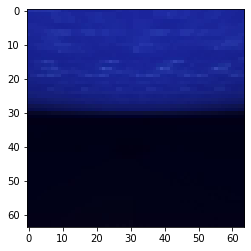

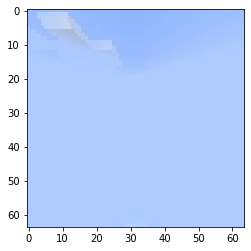

Guessed actions:  [[  24.  631.  178. -277.   98.  -21.  -80.  -42.   28.   18.  -17.]]
Actual actions:  [[  38.  756.  174. -335.   51.  -40. -117.  -34.   28.  -15.  -44.]]


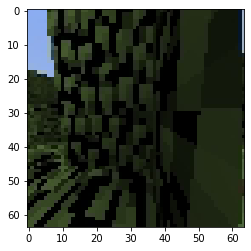

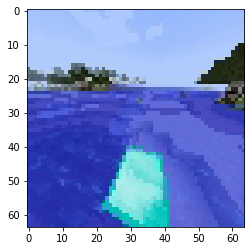

Guessed actions:  [[  32.  413.   79. -177.   21.  -23.  -72.  -29.   27.   -6.   13.]]
Actual actions:  [[  42.  179.  117. -114.  116.   95.    5.  -69.   -5.   58.  -11.]]


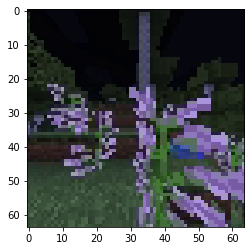

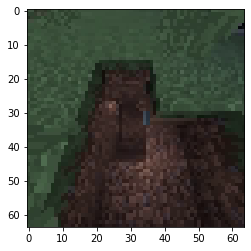

Guessed actions:  [[  29.  314.   75. -125.   49.   -0.  -55.  -31.    3.  -26.   11.]]
Actual actions:  [[  29.  503.  121. -204.   21.  -54.  -79.  -27.   11.  -31.    8.]]


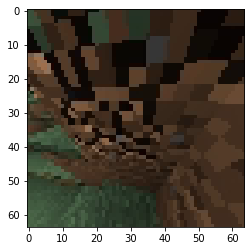

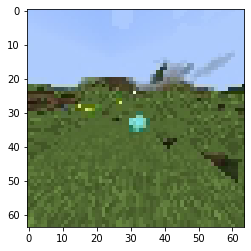

Guessed actions:  [[  22.  815.  204. -339.   64.  -50. -139.  -33.   56.    5.  -32.]]
Actual actions:  [[  19.  877.  176. -319.    0. -144. -148.    2.   86.  -56.   -1.]]


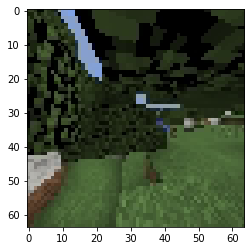

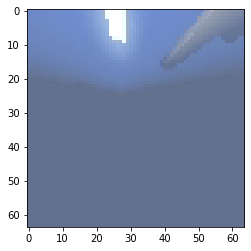

Guessed actions:  [[  18.  767.  186. -324.   74.  -29. -115.  -27.   54.  -26.  -24.]]
Actual actions:  [[  45.  382.  102. -147.   39.  -22.  -61.  -32.   13.  -28.   18.]]


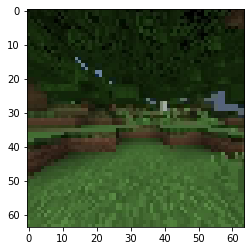

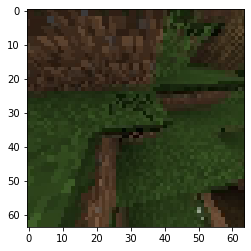

Guessed actions:  [[  19.  440.  142. -188.   70.  -19.  -44.  -46.   26.   10.   -7.]]
Actual actions:  [[  39.  691.  113. -266.    6. -108. -113.  -20.   77.  -64.   -3.]]


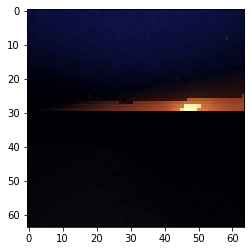

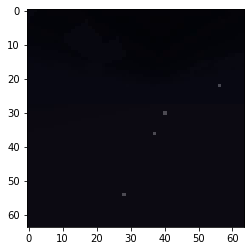

Guessed actions:  [[   5.  332.   95. -146.   50.  -11.  -36.  -32.    8.    8.   -6.]]
Actual actions:  [[  25.  753.  167. -307.   25. -110. -116.  -19.   54.  -10.    2.]]


In [55]:
for i in range(10):    
    video, actions, compass_angle, rewards = generate_random_video(path)

    batch = np.random.randint(video.shape[0])
    frames = np.array(video[batch-4:batch])
    next_frames = np.array(video[batch-3:batch+1])

    plt.imshow(video[0].astype(np.uint8))
    plt.show()

    plt.imshow(video[-1].astype(np.uint8))
    plt.show()

    actions = np.array(actions[batch])
    frames = stack_frames(video, compass_angle[batch]).reshape(1, 64, 64, 5)
    n_frames = stack_frames(next_frames, compass_angle[batch+1]).reshape(1, 64, 64, 5)

    print("Guessed actions: ", np.round(q_model(frames)))
    print("Actual actions: ", np.round(target_model(n_frames)))

In [16]:
target_model.save("target_q_model.h5")
q_model.save("q_model.h5")